In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('pokemon_pokedex.xlsx')

df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"Fire, Ice, Flying, Psychic","002: Ivysaur, 003: Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","Fire, Ice, Flying, Psychic",003: Venusaur,001: Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"Fire, Ice, Flying, Psychic",NaN,"001: Bulbasaur, 002: Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"Water, Ground, Rock","005: Charmeleon, 006: Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"Water, Ground, Rock",006: Charizard,004: Charmander


Insights to be drawn -

● Get all Pokemons whose spawn rate is less than 5%.

● Get all Pokemons that have less than 4 weaknesses.

● Get all Pokemons that have no multipliers at all.

● Get all Pokemons that do not have more than 2 evolutions.

● Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities

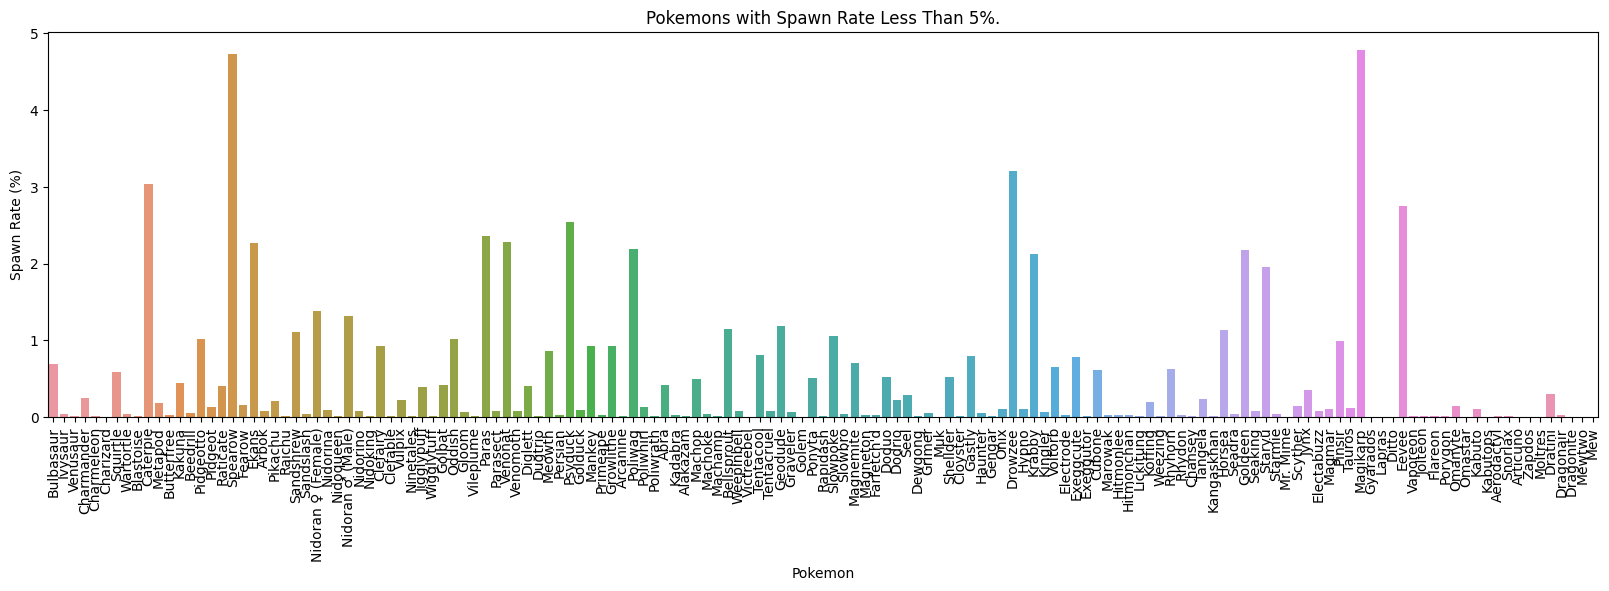

In [2]:
#Get all Pokemons whose spawn rate is less than 5%.

spawn5 = df[df["spawn_chance"] < 5]
plt.figure(figsize=(20,5))
sns.barplot(x = "name", y = "spawn_chance", data = spawn5)
plt.title("Pokemons with Spawn Rate Less Than 5%.")
plt.xlabel("Pokemon")
plt.ylabel("Spawn Rate (%)")
plt.xticks(rotation=90)
plt.show()

In [3]:
#Get all Pokemons that have less than 4 weaknesses.

df["weakness"] = df["weakness"].apply(lambda x: x.split(", "))

weakness = df[df["weakness"].apply(len) < 4]       # Creating new variable as 'weaknesses' which will store values of all Pokemons that have less than 4 weaknesses

weakness

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","005: Charmeleon, 006: Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]",006: Charizard,004: Charmander
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"[Water, Electric, Rock]",NaN,"004: Charmander, 005: Charmeleon"
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,[2.1],"[Electric, Grass]","008: Wartortle, 009: Blastoise",NaN
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"[Electric, Grass]",009: Blastoise,007: Squirtle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"[Water, Electric, Rock]",NaN,NaN
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","148: Dragonair, 149: Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]",149: Dragonite,147: Dratini
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"[Bug, Ghost, Dark]",NaN,NaN


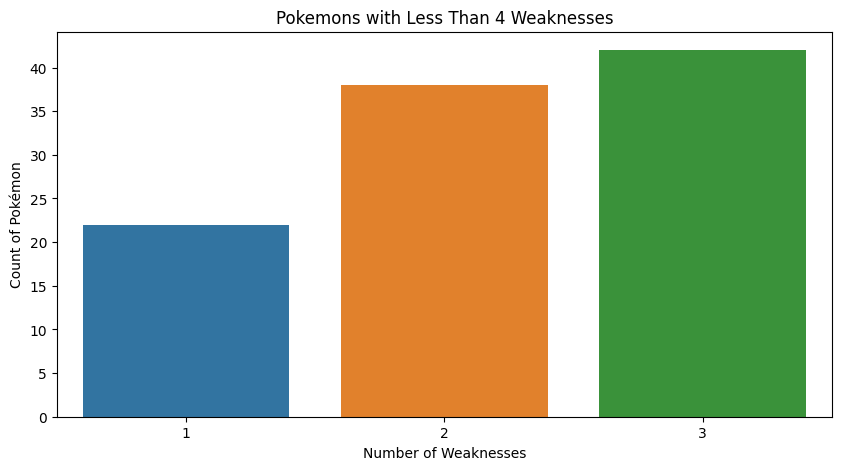

In [4]:
# Bar plot for Pokemons that have less than 4 weaknesses

plt.figure(figsize=(10, 5))
sns.countplot(x=weakness["weakness"].apply(len))
plt.title("Pokemons with Less Than 4 Weaknesses")
plt.xlabel("Number of Weaknesses")
plt.ylabel("Count of Pokémon")
plt.show()

In [5]:
#Get all Pokemons that have no multipliers at all

# Checking unique values in multipliers column.
unique_multipliers = df["multipliers"].unique()    
print(unique_multipliers)

# Creating new variable as 'no_multipliers' which will store values of all Pokemons that have no multipliers at all.

no_multipliers = df[df["multipliers"].apply(lambda x: isinstance(x, float) or len(x) == 0)]

no_multipliers

['[1.58]' '[1.2, 1.6]' nan '[1.65]' '[1.79]' '[2.1]' '[1.4]' '[1.05]'
 '[3.55, 3.79]' '[1.01, 1.09]' '[3.01, 3.41]' '[1.71, 1.92]'
 '[2.55, 2.73]' '[2.66, 2.68]' '[2.21, 2.27]' '[2.34]' '[2.45]'
 '[1.63, 2.48]' '[1.83, 2.48]' '[1.64, 1.7]' '[1.83]' '[2.03, 2.14]'
 '[2.74, 2.81]' '[1.85]' '[2.6, 3.67]' '[1.5]' '[1.49]' '[2.02]'
 '[1.86, 1.9]' '[2.69]' '[1.98]' '[2.27]' '[2.17, 2.28]' '[2.31, 2.36]'
 '[1.72, 1.73]' '[1.95]' '[1.36, 1.95]' '[1.64, 1.65]' '[1.7]' '[1.57]'
 '[1.59]' '[2.52]' '[1.75, 1.76]' '[1.64, 1.72]' '[1.48, 1.5]' '[2.21]'
 '[2.16, 2.17]' '[2.19, 2.24]' '[1.04, 1.96]' '[2.44]' '[2.65]' '[1.78]'
 '[1.56, 1.8]' '[2.08, 2.09]' '[2.36, 2.4]' '[2.01, 2.02]' '[2.7, 3.18]'
 '[1.67]' '[1.11]' '[1.91]' '[2.23]' '[2.15, 2.2]' '[2.38, 2.41]'
 '[10.1, 11.8]' '[2.02, 2.64]' '[2.12]' '[1.97, 2.37]' '[1.83, 1.84]'
 '[2.05]']


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"001: Bulbasaur, 002: Ivysaur"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"[Water, Electric, Rock]",NaN,"004: Charmander, 005: Charmeleon"
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.67,00:06,NaN,"[Electric, Grass]",NaN,"007: Squirtle, 008: Wartortle"
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"Bug, Flying",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,0.0220,2.20,05:23,NaN,"[Fire, Electric, Ice, Flying, Rock]",NaN,"010: Caterpie, 011: Metapod"
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"Bug, Poison",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,0.0510,5.10,04:50,NaN,"[Fire, Flying, Psychic, Rock]",NaN,"013: Weedle, 014: Kakuna"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"Electric, Flying",1.60 m,52.6 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"[Ice, Rock]",NaN,NaN
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"[Water, Electric, Rock]",NaN,NaN
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"[Ice, Rock, Dragon, Fairy]",NaN,"147: Dratini, 148: Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"[Bug, Ghost, Dark]",NaN,NaN


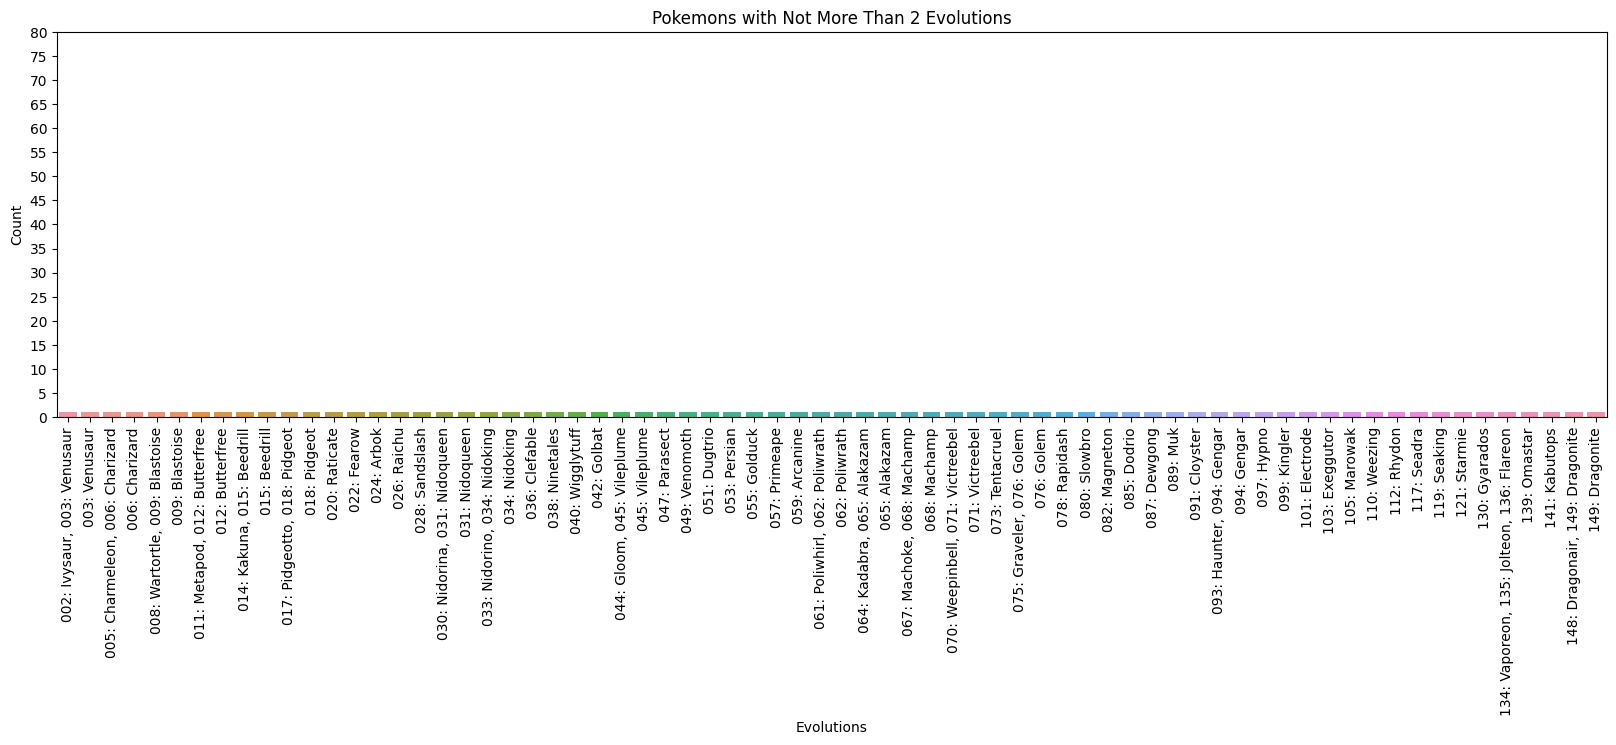

In [6]:
#Get all Pokemons that do not have more than 2 evolutions

# Creating new variable as 'no_more_than_2_evolutions' which will store values of all Pokemons that do not have more than 2 evolutions.

num_evolutions = df[df["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0) <= 2]

num_evolutions

# Bar plot for Pokemons that do not have more than 2 evolutions

plt.figure(figsize=(20, 5))
sns.countplot(x="next_evolution", data=num_evolutions)
plt.title("Pokemons with Not More Than 2 Evolutions")
plt.xlabel("Evolutions")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.yticks(range(0, 85, 5))
plt.show()

In [7]:
#Creating Spawn Time in minutes and seconds

df['spawn_time'] .str.split(':').str[0]

df['spawn_time_minutes'] = df['spawn_time'] .str.split(':').str[0]

df['spawn_time'] .str.split(':').str[1]

df['spawn_time_seconds'] = df['spawn_time'] .str.split(':').str[1]

df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution,spawn_time_minutes,spawn_time_seconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","002: Ivysaur, 003: Venusaur",NaN,20,00
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]",003: Venusaur,001: Bulbasaur,07,00
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"001: Bulbasaur, 002: Ivysaur",11,30
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","005: Charmeleon, 006: Charizard",NaN,08,45
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]",006: Charizard,004: Charmander,19,00


In [8]:
#making spawn minutes and seconds float
df['spawn_time_minutes']=df['spawn_time_minutes'].astype(float)

df['spawn_time_seconds']=df['spawn_time_seconds'].astype(float)

#Creating New column of total second
df["spawn_time_total_seconds"] = df["spawn_time_minutes"] * 60 + df["spawn_time_seconds"]
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution,spawn_time_minutes,spawn_time_seconds,spawn_time_total_seconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","002: Ivysaur, 003: Venusaur",NaN,20.0,0.0,1200.0
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]",003: Venusaur,001: Bulbasaur,7.0,0.0,420.0
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"[Fire, Ice, Flying, Psychic]",NaN,"001: Bulbasaur, 002: Ivysaur",11.0,30.0,690.0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","005: Charmeleon, 006: Charizard",NaN,8.0,45.0,525.0
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]",006: Charizard,004: Charmander,19.0,0.0,1140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","148: Dragonair, 149: Dragonite",NaN,6.0,41.0,401.0
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]",149: Dragonite,147: Dratini,11.0,57.0,717.0
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"[Ice, Rock, Dragon, Fairy]",NaN,"147: Dratini, 148: Dragonair",23.0,38.0,1418.0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"[Bug, Ghost, Dark]",NaN,NaN,NaN,NaN,NaN


In [9]:
#Dropping extra columns
df.drop(["spawn_time","spawn_time_minutes","spawn_time_seconds"],axis=1, inplace=True)     # Dropping column which is not in use.


In [11]:
#Get all Pokemons whose spawn time is less than 300 seconds

# Creating new variable as 'spawn_time_less_than_300' which will store values of all Pokemons whose spawn time is less than 300 seconds.

spawn_time_less_than_300 = df[df["spawn_time_total_seconds"] < 300]

spawn_time_less_than_300

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,multipliers,weakness,next_evolution,prev_evolution,spawn_time_total_seconds
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,[2.1],"[Electric, Grass]","008: Wartortle, 009: Blastoise",NaN,265.0
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.67,NaN,"[Electric, Grass]",NaN,"007: Squirtle, 008: Wartortle",6.0
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,Bug,0.71 m,9.9 kg,Caterpie Candy,50.0,Not in Eggs,0.1870,18.70,"[3.55, 3.79]","[Fire, Flying, Rock]",012: Butterfree,010: Caterpie,131.0
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"Bug, Poison",0.30 m,3.2 kg,Weedle Candy,12.0,2 km,7.1200,712.00,"[1.01, 1.09]","[Fire, Flying, Psychic, Rock]","014: Kakuna, 015: Beedrill",NaN,141.0
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"Bug, Poison",0.61 m,10.0 kg,Weedle Candy,50.0,Not in Eggs,0.4400,44.00,"[3.01, 3.41]","[Fire, Flying, Psychic, Rock]",015: Beedrill,013: Weedle,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,128,Tauros,http://www.serebii.net/pokemongo/pokemon/128.png,Normal,1.40 m,88.4 kg,None,NaN,5 km,0.1200,12.00,NaN,[Fighting],NaN,NaN,37.0
129,130,130,Gyarados,http://www.serebii.net/pokemongo/pokemon/130.png,"Water, Flying",6.50 m,235.0 kg,Magikarp Candy,NaN,Not in Eggs,0.0032,0.32,NaN,"[Electric, Rock]",NaN,129: Magikarp,135.0
134,135,135,Jolteon,http://www.serebii.net/pokemongo/pokemon/135.png,Electric,0.79 m,24.5 kg,None,NaN,Not in Eggs,0.0120,1.20,NaN,[Ground],NaN,133: Eevee,150.0
136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,Normal,0.79 m,36.5 kg,None,NaN,5 km,0.0120,1.20,NaN,[Fighting],NaN,NaN,169.0


In [12]:
#Get all Pokemon who have more than two types of capabilities

# Creating new variable as 'more_than_two_types' which will store values of all Pokemons who have more than two types of capabilities.

more_than_two_types = df[df["type"].apply(lambda x: len(x.split(", "))) > 2]
print(more_than_two_types)


Empty DataFrame
Columns: [id, num, name, img, type, height, weight, candy, candy_count, egg, spawn_chance, avg_spawns, multipliers, weakness, next_evolution, prev_evolution, spawn_time_total_seconds]
Index: []
